In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
data = pd.read_excel('telcom_data.xlsx', sheet_name='Sheet1') # Adjust sheet name as needed


In [4]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# use 'data' directly as the dataframe
engagement_data = data

In [6]:
# Display the first few rows and basic information to understand the dataset structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

(              Bearer Id               Start  Start ms                 End  \
 0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
 1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
 2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
 3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
 4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   
 
    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
 0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
 1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
 2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
 3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
 4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
 
   Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
 0   9164566995485190  ...          15854611.0    

In [7]:
print(data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


1. User Overview Analysis

In [8]:
# Step 1: Aggregate Data Per User
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Total session duration
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Total DL (Bytes)': 'sum',  # Total download data
    'Youtube DL (Bytes)': 'sum',  # Data usage for YouTube
    'Netflix DL (Bytes)': 'sum',  # Data usage for Netflix
    'Gaming DL (Bytes)': 'sum',  # Data usage for Gaming
    'Social Media DL (Bytes)': 'sum',  # Data usage for Social Media
    'Google DL (Bytes)': 'sum',  # Data usage for Google
    'Email DL (Bytes)': 'sum',  # Data usage for Email
    'Other DL (Bytes)': 'sum'  # Data usage for Other applications
}).reset_index()


In [9]:
# Calculate total data volume
aggregated_data['Total Data Volume (Bytes)'] = aggregated_data['Total UL (Bytes)'] + aggregated_data['Total DL (Bytes)']

In [10]:
# Check for missing values and data types in the dataset
missing_values = data.isnull().sum()
data_types = data.dtypes

# Combine and display the information for review
missing_and_types = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Type': data_types
}).sort_values(by='Missing Values', ascending=False)

missing_and_types.head(10)  # Show the top 10 columns with the most missing values or key issues

,Missing Values,Data Type
Nb of sec with 37500B < Vol UL,130254,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,float64
Nb of sec with 125000B < Vol DL,97538,float64
TCP UL Retrans. Vol (Bytes),96649,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,float64
TCP DL Retrans. Vol (Bytes),88146,float64
HTTP UL (Bytes),81810,float64
HTTP DL (Bytes),81474,float64


In [11]:
# Handle Missing Values
# Replace missing values with the column mean
aggregated_data.fillna(aggregated_data.mean(), inplace=True)

User Overview Analysis step by step

In [12]:
import matplotlib.pyplot as plt

# Extract relevant columns for analysis
# Assuming 'Handset Type' and 'Handset Manufacturer' columns exist in the dataset
handset_data = data[['Handset Type', 'Handset Manufacturer']].copy()

# Identify the Top 10 Handsets
top_10_handsets = handset_data['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [13]:
# Identify the Top 3 Handset Manufacturers
top_3_manufacturers = handset_data['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [14]:
# Identify the Top 5 Handsets per Top 3 Manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = handset_data[
        handset_data['Handset Manufacturer'] == manufacturer
    ]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets
    print(top_5_handsets_per_manufacturer)



{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64}
{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64}
{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696

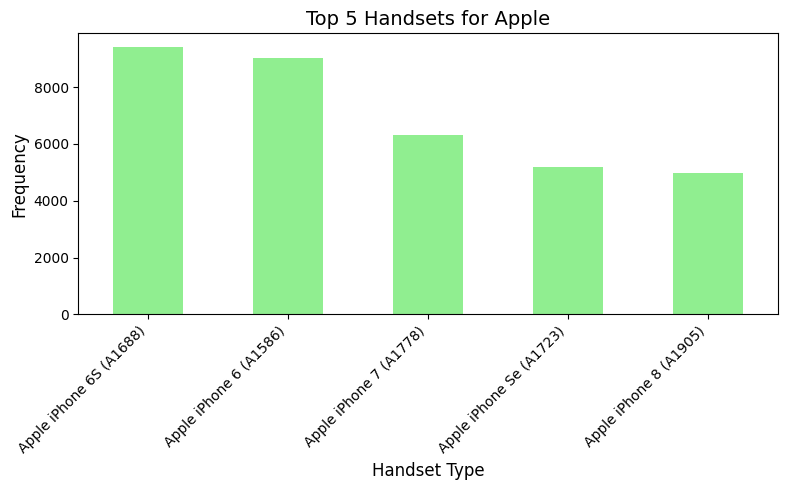

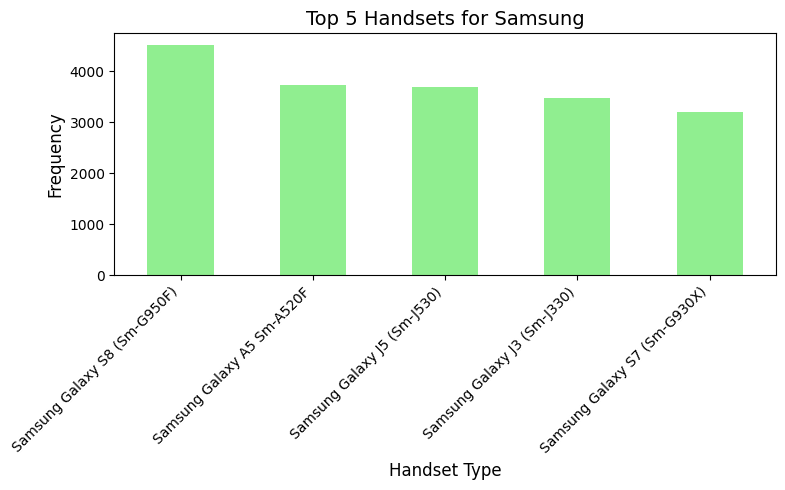

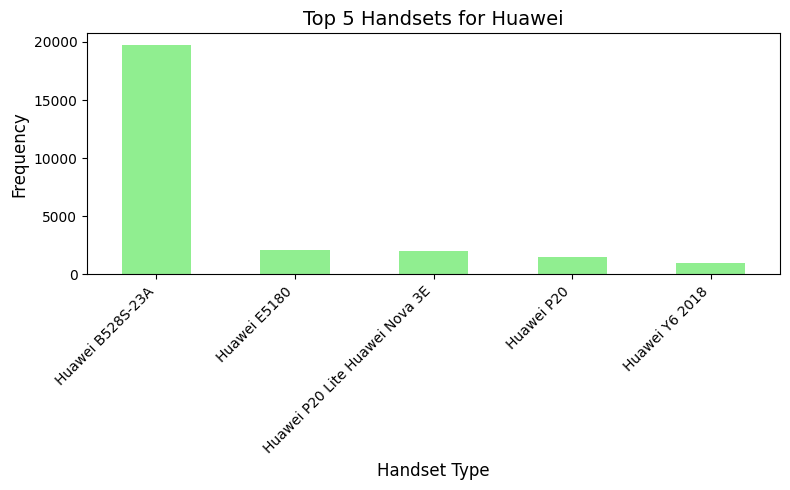

In [15]:
# Plot for Top 3 Manufacturers and Their Popular Handsets
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(8, 5))
    handsets.plot(kind='bar', color='lightgreen')
    plt.title(f'Top 5 Handsets for {manufacturer}', fontsize=14)
    plt.xlabel('Handset Type', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

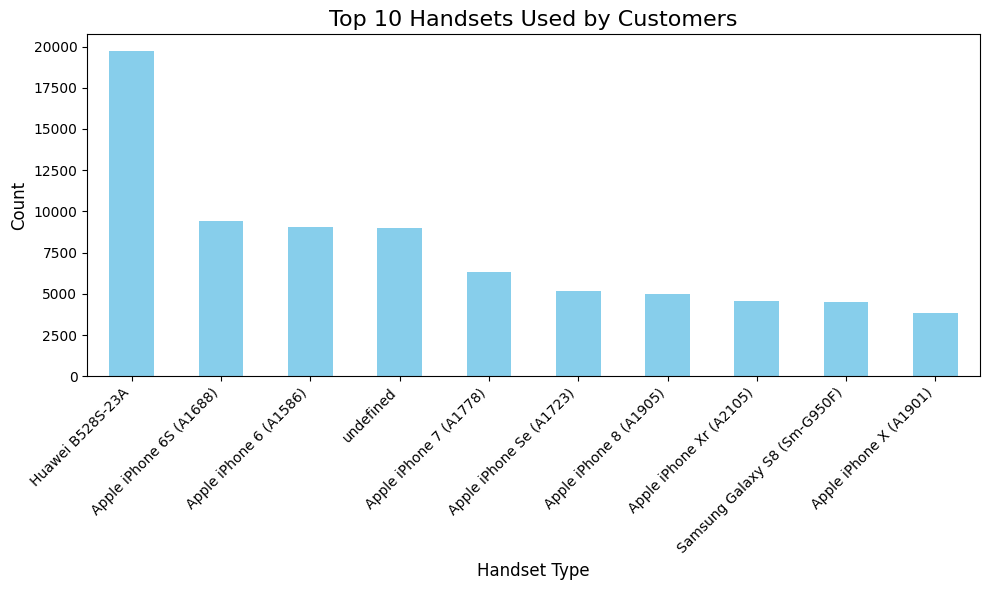

In [16]:
# Plot the Top 10 Handsets
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets Used by Customers', fontsize=16)
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Plan:

Analyze the Handset Type column for the Top 10 handsets.

Analyze the Handset Manufacturer column for the Top 3 manufacturers.

Cross-analyze the above columns to find the Top 5 handsets per manufacturer.


In [17]:
# Detect and Treat Outliers
# Using Z-score to detect outliers
from scipy.stats import zscore

In [18]:
# Identify numeric columns
numeric_cols = aggregated_data.select_dtypes(include=np.number).columns

In [19]:
# Iterate through each numeric column
for col in numeric_cols:
    # Calculate z-scores for the column
    z_col = np.abs(zscore(aggregated_data[col]))


In [20]:
# Calculate Z-scores for numeric columns
numeric_cols = aggregated_data.select_dtypes(include=np.number).columns
z_scores = np.abs(zscore(aggregated_data[numeric_cols]))
outlier_threshold = 3  # Define threshold for outliers

In [21]:
    # Replace outliers with the column mean (based on threshold)
aggregated_data.loc[z_col > outlier_threshold, col] = aggregated_data[col].mean()

In [22]:
# Save cleaned and aggregated data
aggregated_data.to_csv('cleaned_aggregated_data.csv', index=False)

print("Data aggregation and cleaning complete. Saved to cleaned_aggregated_data.csv.")

data.head()

Data aggregation and cleaning complete. Saved to cleaned_aggregated_data.csv.


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [23]:
# Calculate Sessions Frequency
session_frequency = data.groupby('MSISDN/Number').size().reset_index(name='Session Frequency')
print(session_frequency)

        MSISDN/Number  Session Frequency
0        3.360100e+10                  1
1        3.360100e+10                  1
2        3.360100e+10                  1
3        3.360101e+10                  1
4        3.360101e+10                  2
...               ...                ...
106851   3.379000e+10                  1
106852   3.379000e+10                  1
106853   3.197021e+12                  1
106854   3.370000e+14                  1
106855   8.823971e+14                  1

[106856 rows x 2 columns]


In [24]:
# Calculate Average Session Duration
avg_session_duration = data.groupby('MSISDN/Number')['Dur. (ms)'].mean().reset_index(name='Avg Session Duration (ms)')
print(avg_session_duration)

        MSISDN/Number  Avg Session Duration (ms)
0        3.360100e+10                   116720.0
1        3.360100e+10                   181230.0
2        3.360100e+10                   134969.0
3        3.360101e+10                    49878.0
4        3.360101e+10                    18552.0
...               ...                        ...
106851   3.379000e+10                     8810.0
106852   3.379000e+10                   140988.0
106853   3.197021e+12                   877385.0
106854   3.370000e+14                   253030.0
106855   8.823971e+14                   869844.0

[106856 rows x 2 columns]


In [25]:
# Calculate Total Traffic
traffic_data = data.groupby('MSISDN/Number').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
traffic_data['Total Traffic (Bytes)'] = traffic_data['Total UL (Bytes)'] + traffic_data['Total DL (Bytes)']
print(traffic_data)

        MSISDN/Number  Total UL (Bytes)  Total DL (Bytes)  \
0        3.360100e+10        36053108.0      8.426375e+08   
1        3.360100e+10        36104459.0      1.207552e+08   
2        3.360100e+10        39306820.0      5.566597e+08   
3        3.360101e+10        20327526.0      4.019932e+08   
4        3.360101e+10        94280527.0      1.363130e+09   
...               ...               ...               ...   
106851   3.379000e+10        26716429.0      6.879252e+08   
106852   3.379000e+10        35732243.0      4.445751e+08   
106853   3.197021e+12        37295915.0      1.948281e+08   
106854   3.370000e+14        56652839.0      5.396350e+08   
106855   8.823971e+14        60456049.0      7.869760e+07   

        Total Traffic (Bytes)  
0                8.786906e+08  
1                1.568596e+08  
2                5.959665e+08  
3                4.223207e+08  
4                1.457411e+09  
...                       ...  
106851           7.146416e+08  
106852     

In [26]:
# Merge All Metrics
user_engagement = session_frequency.merge(avg_session_duration, on='MSISDN/Number')
user_engagement = user_engagement.merge(traffic_data, on='MSISDN/Number')
print(user_engagement)

        MSISDN/Number  Session Frequency  Avg Session Duration (ms)  \
0        3.360100e+10                  1                   116720.0   
1        3.360100e+10                  1                   181230.0   
2        3.360100e+10                  1                   134969.0   
3        3.360101e+10                  1                    49878.0   
4        3.360101e+10                  2                    18552.0   
...               ...                ...                        ...   
106851   3.379000e+10                  1                     8810.0   
106852   3.379000e+10                  1                   140988.0   
106853   3.197021e+12                  1                   877385.0   
106854   3.370000e+14                  1                   253030.0   
106855   8.823971e+14                  1                   869844.0   

        Total UL (Bytes)  Total DL (Bytes)  Total Traffic (Bytes)  
0             36053108.0      8.426375e+08           8.786906e+08  
1          

In [27]:
# Save the user engagement data
user_engagement.to_csv('user_engagement_metrics.csv', index=False)

In [28]:
# Generate Insights
# Descriptive Statistics
print("Descriptive Statistics:")
print(user_engagement.describe())

Descriptive Statistics:
       MSISDN/Number  Session Frequency  Avg Session Duration (ms)  \
count   1.068560e+05      106856.000000               1.068560e+05   
mean    4.511474e+10           1.393792               1.026948e+05   
std     2.889423e+12           0.806022               7.224737e+04   
min     3.360100e+10           1.000000               7.142000e+03   
25%     3.365088e+10           1.000000               5.640975e+04   
50%     3.366365e+10           1.000000               8.640000e+04   
75%     3.368344e+10           2.000000               1.339121e+05   
max     8.823971e+14          18.000000               1.573420e+06   

       Total UL (Bytes)  Total DL (Bytes)  Total Traffic (Bytes)  
count      1.068560e+05      1.068560e+05           1.068560e+05  
mean       5.730942e+07      6.336527e+08           6.909621e+08  
std        3.565765e+07      4.645551e+08           4.910559e+08  
min        2.866892e+06      8.827082e+06           3.324901e+07  
25%       

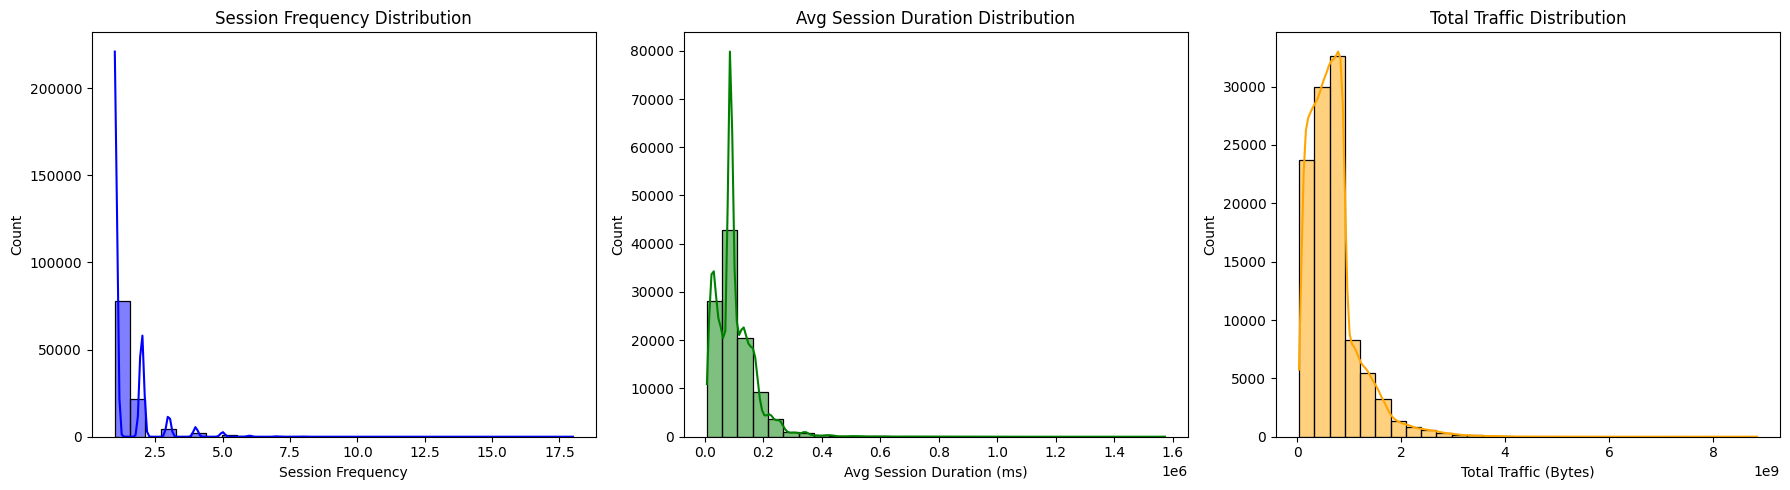

In [29]:
import seaborn as sns

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram for Session Frequency
plt.subplot(1, 3, 1)
sns.histplot(user_engagement['Session Frequency'], bins=30, kde=True, color='blue')
plt.title('Session Frequency Distribution')
plt.xlabel('Session Frequency')
plt.ylabel('Count')

# Histogram for Average Session Duration
plt.subplot(1, 3, 2)
sns.histplot(user_engagement['Avg Session Duration (ms)'], bins=30, kde=True, color='green')
plt.title('Avg Session Duration Distribution')
plt.xlabel('Avg Session Duration (ms)')
plt.ylabel('Count')

# Histogram for Total Traffic
plt.subplot(1, 3, 3)
sns.histplot(user_engagement['Total Traffic (Bytes)'], bins=30, kde=True, color='orange')
plt.title('Total Traffic Distribution')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
# Calculate Total Traffic
engagement_data['Total Traffic (Bytes)'] = engagement_data['Total UL (Bytes)'] + engagement_data['Total DL (Bytes)']
engagement_data.rename(columns={'Dur. (ms)': 'Session Duration (ms)'}, inplace=True)

In [31]:
# Top 10 Customers Per Metric
metrics = ['Session Duration (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Traffic (Bytes)']
top_customers = {
    metric: engagement_data.nlargest(10, metric) for metric in metrics}
print(top_customers)

{'Session Duration (ms)':                    Bearer Id               Start  Start ms  \
125000  13042425888056700928 2019-04-09 09:47:39     752.0   
125001  13114483482094899200 2019-04-09 09:47:45     547.0   
0       13114483460844900352 2019-04-04 12:01:18     770.0   
125002  13042425892766199808 2019-04-10 09:47:45     144.0   
125003  13042425897887000576 2019-04-11 09:48:22     524.0   
100000  13114483483343300608 2019-04-09 14:57:42     414.0   
100001  13114483485797599232 2019-04-10 03:25:27     731.0   
125004  13042425902779299840 2019-04-12 09:48:28     328.0   
100002   7349883197380169728 2019-04-11 13:40:34     575.0   
25002   13114483483535099904 2019-04-09 15:41:51     524.0   

                       End  End ms  Session Duration (ms)          IMSI  \
125000 2019-04-30 22:16:36   194.0              1859336.0  2.082010e+14   
125001 2019-04-30 22:16:33   539.0              1859327.0  2.082010e+14   
0      2019-04-25 14:35:31   662.0              1823652.0  2.08201

In [32]:
from sklearn.preprocessing import MinMaxScaler
 # Normalize Metrics for Clustering
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(engagement_data[metrics])

In [33]:
# Check for missing values in the NumPy array
missing_values = np.isnan(normalized_data).sum()
print(f"Total missing values: {missing_values}")

# Handle missing values (impute with column means)
# Compute the column-wise mean, ignoring NaNs
col_means = np.nanmean(normalized_data, axis=0)

# Replace NaNs with the column means
normalized_data = np.where(np.isnan(normalized_data), col_means, normalized_data)


Total missing values: 4


In [34]:
from sklearn.cluster import KMeans
# K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_data['Cluster'] = kmeans.fit_predict(normalized_data)

In [35]:
# Compute Cluster Statistics
cluster_stats = engagement_data.groupby('Cluster').agg({
    'Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})
print(cluster_stats)

        Session Duration (ms)                                          \
                          min        max           mean           sum   
Cluster                                                                 
0                      7142.0  1772931.0  104823.885101  5.258595e+09   
1                      7189.0  1859336.0  104515.829126  5.249203e+09   
2                      7146.0  1859327.0  104484.701270  5.183486e+09   

        Total UL (Bytes)                                          \
                     min         max          mean           sum   
Cluster                                                            
0              4338786.0  78331311.0  4.104126e+07  2.058876e+12   
1              5276726.0  77390291.0  4.095374e+07  2.056861e+12   
2              2866892.0  77157382.0  4.137159e+07  2.052444e+12   

        Total DL (Bytes)                                           \
                     min          max          mean           sum   
Cluster       

In [36]:
# Determine Optimal k Using Elbow Method
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

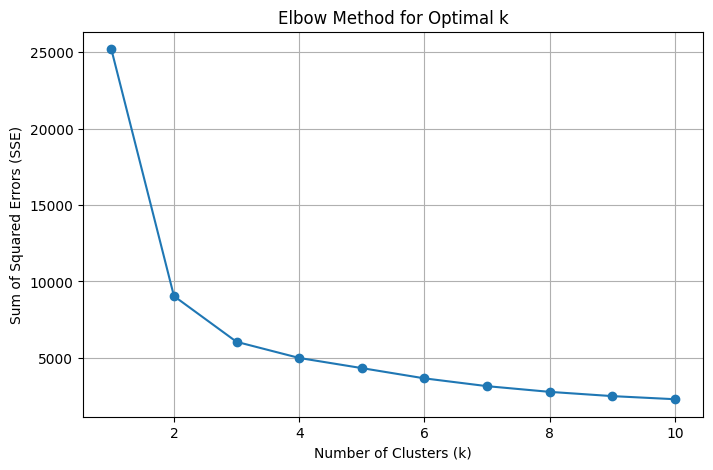

In [37]:

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

Steep Drop: As k increases, SSE decreases significantly at first because more clusters reduce the distance between points and their centroids.

Slower Decline: After a certain k, the decrease in SSE becomes gradual. Adding more clusters no longer significantly improves the model.

Elbow Point: The point where this shift occurs is the optimal number of clusters.



In [38]:
# Aggregate User Total Traffic Per Application
application_columns = [
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Other DL (Bytes)'
]
application_traffic = data.groupby('MSISDN/Number')[application_columns].sum().reset_index()
print(application_traffic)

        MSISDN/Number  Youtube DL (Bytes)  Netflix DL (Bytes)  \
0        3.360100e+10          14900201.0          10265105.0   
1        3.360100e+10           5324251.0            770569.0   
2        3.360100e+10           2137272.0          16525919.0   
3        3.360101e+10           4393123.0           1157362.0   
4        3.360101e+10          10339971.0          24971647.0   
...               ...                 ...                 ...   
106851   3.379000e+10           8294310.0          14754741.0   
106852   3.379000e+10           5596862.0           6929961.0   
106853   3.197021e+12           9839889.0          10340908.0   
106854   3.370000e+14          16690728.0           9983678.0   
106855   8.823971e+14          18980320.0          21621336.0   

        Gaming DL (Bytes)  Social Media DL (Bytes)  Google DL (Bytes)  \
0            8.110911e+08                2206504.0          3337123.0   
1            1.050353e+08                2598548.0          4197697.0   


In [39]:
# Top 10 Most Engaged Users Per Application
top_users_per_app = {
    app: application_traffic.nlargest(10, app) for app in application_columns
}
print(top_users_per_app)

{'Youtube DL (Bytes)':        MSISDN/Number  Youtube DL (Bytes)  Netflix DL (Bytes)  \
13180   3.362578e+10         237883033.0         193912238.0   
6437    3.361489e+10         199823443.0         179585986.0   
92923   3.376054e+10         194068298.0         146500839.0   
13994   3.362708e+10         187323322.0         144623204.0   
92577   3.376041e+10         174245981.0         167023809.0   
86455   3.369879e+10         166900329.0         103027247.0   
13526   3.362632e+10         164048706.0         199479238.0   
666     3.360313e+10         158976704.0         156086546.0   
76363   3.367588e+10         158665235.0         161626462.0   
57241   3.366471e+10         153074482.0         134941569.0   

       Gaming DL (Bytes)  Social Media DL (Bytes)  Google DL (Bytes)  \
13180       7.171884e+09               26564121.0        107904739.0   
6437        7.622035e+09               27749744.0         93941708.0   
92923       7.316364e+09               39297646.0       

In [40]:
# Visualize Top 3 Most Used Applications
# Identify top 3 applications by total traffic
total_traffic_per_app = application_traffic[application_columns].sum().sort_values(ascending=False)
top_3_apps = total_traffic_per_app.head(3).index
print(top_3_apps)

Index(['Gaming DL (Bytes)', 'Other DL (Bytes)', 'Youtube DL (Bytes)'], dtype='object')


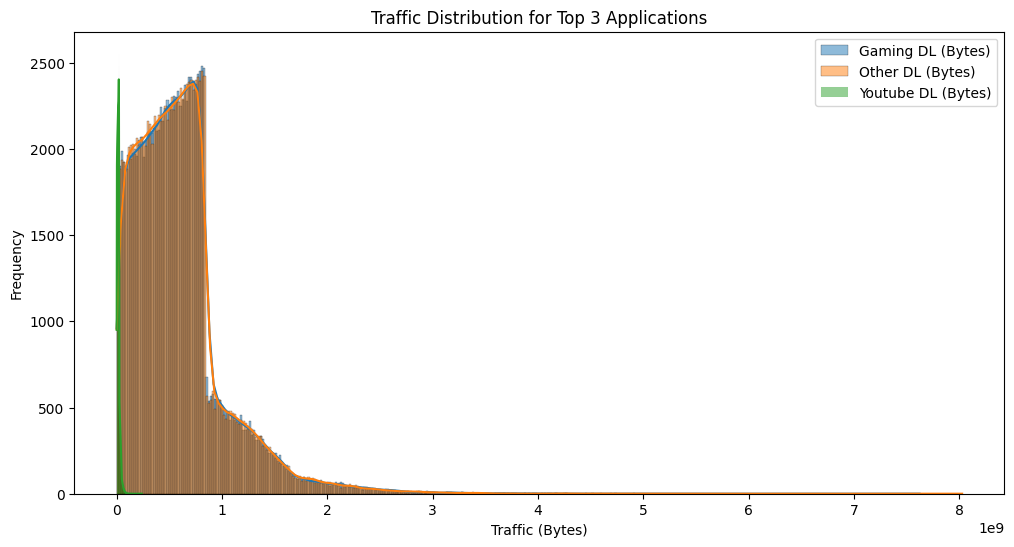

In [41]:
# Plot Traffic for Top 3 Applications
plt.figure(figsize=(12, 6))
for app in top_3_apps:
    sns.histplot(application_traffic[app], kde=True, label=app)
plt.title('Traffic Distribution for Top 3 Applications')
plt.xlabel('Traffic (Bytes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Traffic Volume Variability:

The chart shows how traffic (in Bytes) is distributed for each application.

Wide vs. Narrow Distribution:

A wide distribution suggests significant variability in user traffic (e.g., some users consume a lot, others very little).

A narrow distribution indicates consistent usage patterns across users.

Peak Usage Patterns:

The peaks in the curves represent the most common traffic levels for each application.

Applications with higher peaks at lower traffic indicate high-frequency but low-volume usage.

Applications with broader peaks at higher traffic levels indicate fewer users generating large volumes of traffic.

By observing how the traffic for an application skews (left or right), we can infer:

Right-skewed distributions: A few users generate a disproportionate amount of traffic (heavy users).

Left-skewed distributions: Most users generate similar traffic levels (balanced usage)

In [42]:
 # Step 1: Network Parameter Analysis
# Aggregate network parameters by user
network_data = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)':'sum',
    'Avg RTT DL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()
print(network_data)

        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0        3.360100e+10                          0.0             46.0   
1        3.360100e+10                          0.0             30.0   
2        3.360100e+10                          0.0              NaN   
3        3.360101e+10                       1066.0             69.0   
4        3.360101e+10                    9349630.0             57.0   
...               ...                          ...              ...   
106851   3.379000e+10                     215044.0             42.0   
106852   3.379000e+10                          0.0             34.0   
106853   3.197021e+12                          0.0              NaN   
106854   3.370000e+14                          0.0              NaN   
106855   8.823971e+14                          0.0              NaN   

        Avg Bearer TP DL (kbps)  
0                          37.0  
1                          48.0  
2                          48.0  
3          

In [43]:
# Assuming `data` is the dataset with necessary metrics already cleaned and loaded.

# Check if required columns exist
required_columns = [
    'MSISDN/Number', 'Session Duration (sec)', 'Total DL (Bytes)', 
    'Total UL (Bytes)', 'TCP Retransmission', 'RTT (ms)', 'Throughput (bytes/sec)'
]
if all(col in data.columns for col in required_columns):
   # Step 1: Calculate total data usage and engagement metrics
    data['Total Data (Bytes)'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
    
    # Step 2: Aggregate metrics per user
    satisfaction_data = data.groupby('MSISDN/Number').agg({
        'Session Duration (sec)': 'sum',
        'Total Data (Bytes)': 'sum',
        'TCP Retransmission': 'mean',
        'RTT (ms)': 'mean',
        'Throughput (bytes/sec)': 'mean'
    }).reset_index() 
    
    # Step 3: Create satisfaction categories
    satisfaction_data['Engagement Score'] = (
        satisfaction_data['Session Duration (sec)'] +
        satisfaction_data['Total Data (Bytes)']
    )
    satisfaction_data['Experience Score'] = (
        satisfaction_data['Throughput (bytes/sec)'] - 
        satisfaction_data['TCP Retransmission'] - 
        satisfaction_data['RTT (ms)']
    )
    satisfaction_data['Satisfaction Score'] = (
        0.6 * satisfaction_data['Engagement Score'] + 
        0.4 * satisfaction_data['Experience Score']
    )
    
    # Define satisfaction categories based on quartiles
    satisfaction_data['Satisfaction Category'] = pd.qcut(
        satisfaction_data['Satisfaction Score'], 
        q=4, 
        labels=['Low', 'Medium', 'High', 'Very High']
    )
    # Visualize satisfaction categories
    plt.figure(figsize=(8, 5))
    sns.countplot(data=satisfaction_data, x='Satisfaction Category', palette='coolwarm')
    plt.title('Distribution of Satisfaction Categories', fontsize=14)
    plt.xlabel('Satisfaction Category', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    plt.tight_layout()
    plt.show() 
    # Step 5: Scatterplot for Experience vs. Engagement
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=satisfaction_data, 
        x='Engagement Score', 
        y='Experience Score', 
        hue='Satisfaction Category', 
        palette='coolwarm'
    )
    plt.title('Engagement vs. Experience by Satisfaction Category', fontsize=14)
    plt.xlabel('Engagement Score', fontsize=12)
    plt.ylabel('Experience Score', fontsize=12)
    plt.legend(title='Satisfaction Category')
    plt.tight_layout()
    plt.show()

else:
    print("Required columns are missing from the dataset.") 

Required columns are missing from the dataset.


In [44]:
print(required_columns)

['MSISDN/Number', 'Session Duration (sec)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'TCP Retransmission', 'RTT (ms)', 'Throughput (bytes/sec)']


In [45]:
# TCP Retransmission Analysis
data['Total TCP Retrans (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
tcp_summary = data.groupby('Handset Type')['Total TCP Retrans (Bytes)'].mean()

# RTT Analysis
data['Average RTT (ms)'] = (data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']) / 2
rtt_summary = data.groupby('Handset Type')['Average RTT (ms)'].mean()

# Throughput Analysis
data['Average Throughput (kbps)'] = (data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']) / 2
throughput_summary = data.groupby('Handset Type')['Average Throughput (kbps)'].mean()

# Display summaries
print("TCP Retransmission Summary:", tcp_summary)
print("RTT Summary:", rtt_summary)
print("Throughput Summary:", throughput_summary)

TCP Retransmission Summary: Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      6.162130e+05
A-Link Telecom I. Cubot Note S                                                         4.141173e+07
A-Link Telecom I. Cubot Nova                                                           1.371700e+05
A-Link Telecom I. Cubot Power                                                          8.041000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809             NaN
Zyxel Communicat. Lte7460                                                              4.127655e+07
Zyxel Communicat. Sbg3600                                                              5.348694e+07
Zyxel Communicat. Zyxel Wah7706                            

In [46]:
# Calculate total TCP retransmissions
data['Total TCP Retrans (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

# Group by Handset Type
tcp_retrans_summary = data.groupby('Handset Type')['Total TCP Retrans (Bytes)'].mean().sort_values(ascending=False)

print(tcp_retrans_summary)


Handset Type
Apple iPad Pro (A1652)                                                                 7.015312e+08
Huawei Bln-Al10                                                                        3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl                                                    3.216583e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9                                              2.683127e+08
Samsung Galaxy Tab S3 (Sm-T825)                                                        2.532841e+08
                                                                                           ...     
Zte Blade A506 Blade A506                                                                       NaN
Zte Blade V8 Blade V8                                                                           NaN
Zte Starxtrem By Sfr                                                                            NaN
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    

In [47]:
# Calculate average throughput
data['Average Throughput (kbps)'] = (data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']) / 2

# Group by Handset Type
throughput_summary = data.groupby('Handset Type')['Average Throughput (kbps)'].mean().sort_values(ascending=False)

print(throughput_summary)


Handset Type
Huawei B715S-23C                    54497.115385
New-Bund Technol. Mix 2             52605.500000
Lg G6+                              50067.500000
Zyxel Communicat. Sbg3600           48675.500000
Huawei Y9 2019                      45869.500000
                                        ...     
Samsung Gt-S6310N                       1.000000
Quectel Wireless. Quectel Ec21-E        1.000000
Quectel Wireless. Quectel Ec25-E        0.500000
Lg Lg-T385                              0.000000
Wct Uno                                 0.000000
Name: Average Throughput (kbps), Length: 1396, dtype: float64


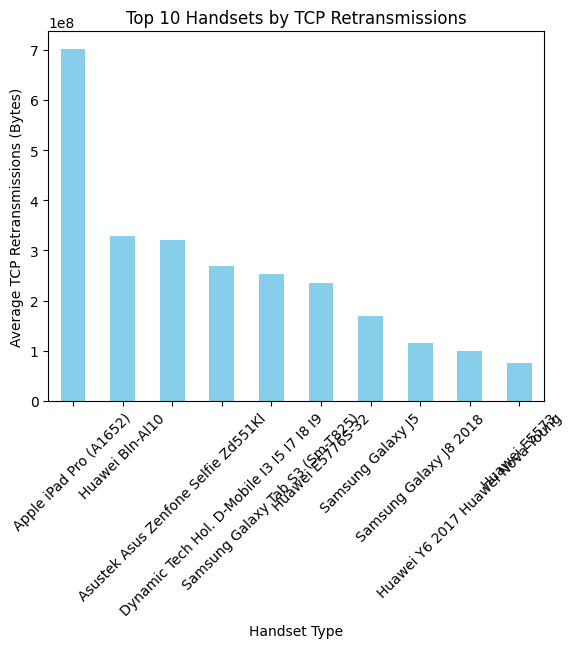

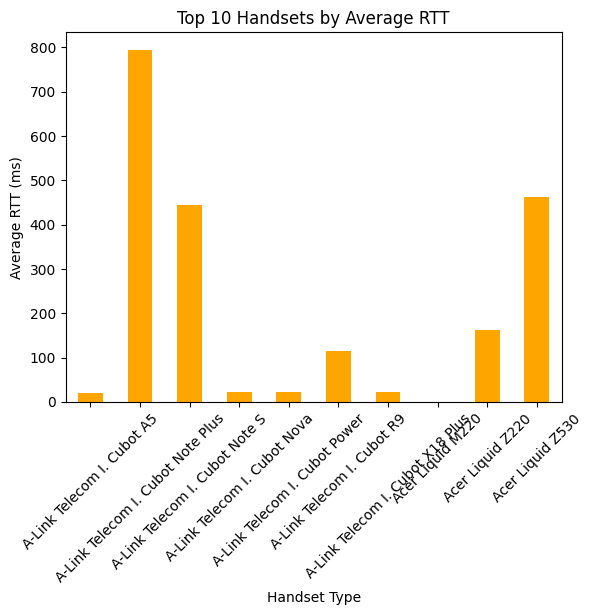

In [48]:
import matplotlib.pyplot as plt

# Example: Plot TCP Retransmissions
tcp_retrans_summary.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets by TCP Retransmissions')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmissions (Bytes)')
plt.xticks(rotation=45)
plt.show()

# Example: Plot RTT
rtt_summary.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Handsets by Average RTT')
plt.xlabel('Handset Type')
plt.ylabel('Average RTT (ms)')
plt.xticks(rotation=45)
plt.show()


In [49]:
print(tcp_retrans_summary.head(10))

Handset Type
Apple iPad Pro (A1652)                       7.015312e+08
Huawei Bln-Al10                              3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl          3.216583e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    2.683127e+08
Samsung Galaxy Tab S3 (Sm-T825)              2.532841e+08
Huawei E5776S-32                             2.350214e+08
Samsung Galaxy J5                            1.696206e+08
Samsung Galaxy J8 2018                       1.157583e+08
Huawei Y6 2017 Huawei Nova Young             9.945159e+07
Huawei E5573                                 7.652559e+07
Name: Total TCP Retrans (Bytes), dtype: float64


In [50]:
print(rtt_summary.head())

Handset Type
A-Link Telecom I. Cubot A5            21.0
A-Link Telecom I. Cubot Note Plus    794.5
A-Link Telecom I. Cubot Note S       445.0
A-Link Telecom I. Cubot Nova          22.0
A-Link Telecom I. Cubot Power         21.5
Name: Average RTT (ms), dtype: float64


TCP Retransmission:

Identify the devices with the highest retransmissions and collaborate with manufacturers to resolve issues.

Focus on optimizing network conditions for devices with high retransmissions.

RTT:

Highlight regions or devices with consistently high RTT values.

Recommend network enhancements or better hardware support for affected devices.

Throughput:

Identify devices with low throughput and correlate with network or hardware limitations.

Recommend targeted marketing for devices with high throughput performance.

In [51]:
# Ensure necessary columns are loaded from the data sample to compute metrics
required_columns = [
    'Handset Type', 'Handset Manufacturer',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]

# Check if the required columns are present in the data sample
missing_columns = [col for col in required_columns if col not in data.columns]

if not missing_columns:
    # TCP Retransmission Calculation
    data['Total TCP Retrans (Bytes)'] = (
        data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
    )
    tcp_retrans_summary = (
        data.groupby('Handset Type')['Total TCP Retrans (Bytes)'].mean().sort_values(ascending=False)
    )

    # RTT Calculation
    data['Average RTT (ms)'] = (
        data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
    ) / 2
    rtt_summary = (
        data.groupby('Handset Type')['Average RTT (ms)'].mean().sort_values(ascending=True)
    )

    # Throughput Calculation
    data['Average Throughput (kbps)'] = (
        data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
    ) / 2
    throughput_summary = (
        data.groupby('Handset Type')['Average Throughput (kbps)'].mean().sort_values(ascending=False)
    )

    tcp_retrans_summary.head(10), rtt_summary.head(10), throughput_summary.head(10)
else:
    missing_columns  # Return the missing columns for feedback


In [52]:
print(missing_columns)

[]


In [53]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Session Duration (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Cluster,Total TCP Retrans (Bytes),Average RTT (ms),Average Throughput (kbps)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,1,NaN,23.5,33.5
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,2,NaN,35.0,21.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,1,NaN,NaN,7.5
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,2,NaN,NaN,44.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,0,NaN,NaN,7.5


Top 10 Handsets by Average TCP Retransmissions:
Handset Type
Apple iPad Pro (A1652)                       7.015312e+08
Huawei Bln-Al10                              3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl          3.216583e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    2.683127e+08
Samsung Galaxy Tab S3 (Sm-T825)              2.532841e+08
Huawei E5776S-32                             2.350214e+08
Samsung Galaxy J5                            1.696206e+08
Samsung Galaxy J8 2018                       1.157583e+08
Huawei Y6 2017 Huawei Nova Young             9.945159e+07
Huawei E5573                                 7.652559e+07
Name: Total TCP Retrans (Bytes), dtype: float64


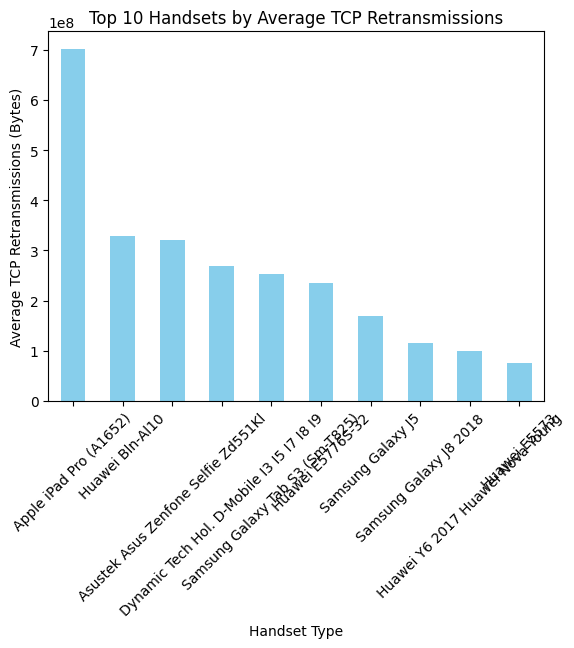

In [54]:
# Calculate Total TCP Retransmissions
data['Total TCP Retrans (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

# Group by Handset Type and calculate average retransmissions
tcp_retrans_summary = data.groupby('Handset Type')['Total TCP Retrans (Bytes)'].mean().sort_values(ascending=False)

# Display the top 10 Handsets by TCP Retransmissions
print("Top 10 Handsets by Average TCP Retransmissions:")
print(tcp_retrans_summary.head(10))

# Plot the results
tcp_retrans_summary.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets by Average TCP Retransmissions')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmissions (Bytes)')
plt.xticks(rotation=45)
plt.show()


Top 10 Handsets by Lowest Average RTT:
Handset Type
Huawei Bnd-Al10                                    7.5
Huawei Fig-La1                                     9.5
Telit Le910-Eug                                    9.5
Lg-H791F                                          11.0
Casper Bilgisaya. Via M1                          11.0
Apple iPhone 8 Plus (A1899)                       11.0
Rim Blackberry Rhm181Lw (Stv100-4)                11.5
Tcl Communicatio. Blackberry Bba100-2             12.0
Samsung Galaxy J5 Prime Dual-Sim (Sm-G570F Ds)    12.0
Lenovo Moto G (5Th Gen) Da12936945                12.0
Name: Average RTT (ms), dtype: float64


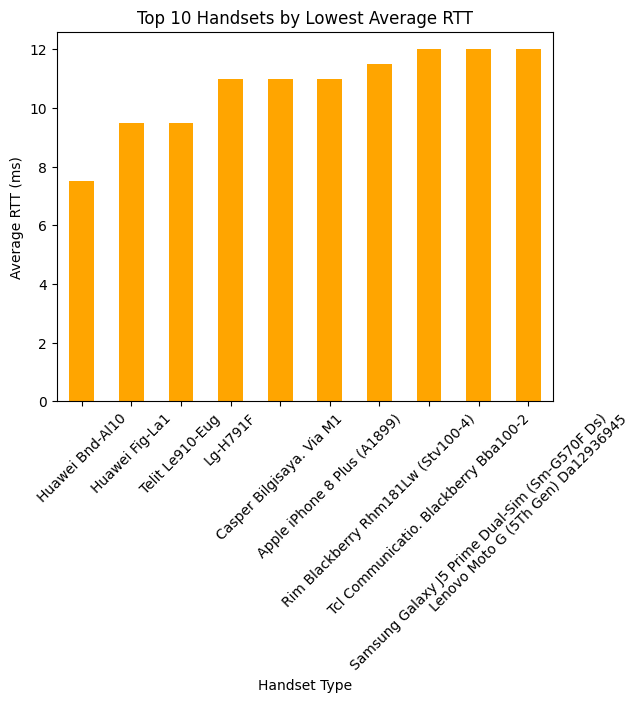

In [55]:
# Calculate Average RTT
data['Average RTT (ms)'] = (data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']) / 2

# Group by Handset Type and calculate average RTT
rtt_summary = data.groupby('Handset Type')['Average RTT (ms)'].mean().sort_values()

# Display the top 10 Handsets with lowest RTT
print("Top 10 Handsets by Lowest Average RTT:")
print(rtt_summary.head(10))

# Plot the results
rtt_summary.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Handsets by Lowest Average RTT')
plt.xlabel('Handset Type')
plt.ylabel('Average RTT (ms)')
plt.xticks(rotation=45)
plt.show()


Top 10 Handsets by Average Throughput:
Handset Type
Huawei B715S-23C               54497.115385
New-Bund Technol. Mix 2        52605.500000
Lg G6+                         50067.500000
Zyxel Communicat. Sbg3600      48675.500000
Huawei Y9 2019                 45869.500000
Xiaomi Communica. M1902F1G     42806.833333
Spa Condor Elect. Allure M2    42155.750000
Ovvi-Cellphone T. Echo         39476.500000
Huawei Pele                    39190.500000
Spa Condor Elect. Plume L2     38264.500000
Name: Average Throughput (kbps), dtype: float64


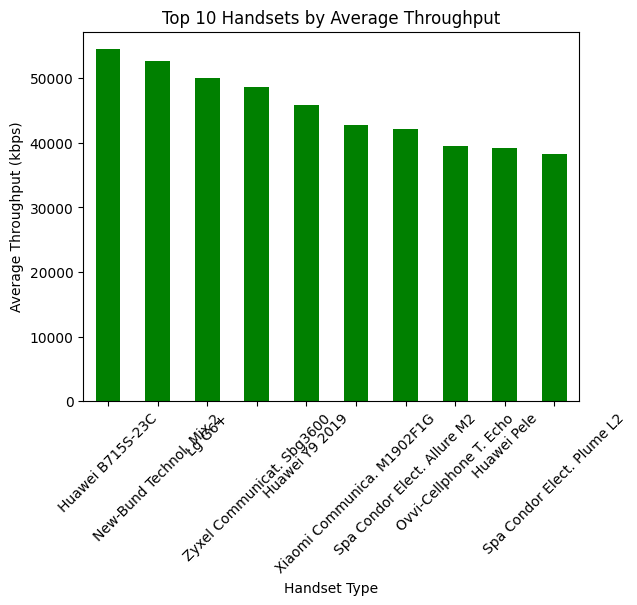

In [56]:
# Calculate Average Throughput
data['Average Throughput (kbps)'] = (data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']) / 2

# Group by Handset Type and calculate average throughput
throughput_summary = data.groupby('Handset Type')['Average Throughput (kbps)'].mean().sort_values(ascending=False)

# Display the top 10 Handsets by Throughput
print("Top 10 Handsets by Average Throughput:")
print(throughput_summary.head(10))

# Plot the results
throughput_summary.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Handsets by Average Throughput')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45)
plt.show()


Combining Insights for Device Characteristics

In [57]:
# Combine metrics into a single summary DataFrame
summary = data.groupby('Handset Type').agg({
    'Total TCP Retrans (Bytes)': 'mean',
    'Average RTT (ms)': 'mean',
    'Average Throughput (kbps)': 'mean'
}).sort_values('Average Throughput (kbps)', ascending=False)

# Display the summary
print("Combined Metrics Summary for Handset Types:")
print(summary.head(10))


Combined Metrics Summary for Handset Types:
                             Total TCP Retrans (Bytes)  Average RTT (ms)  \
Handset Type                                                               
Huawei B715S-23C                          3.573070e+07         59.076923   
New-Bund Technol. Mix 2                   1.121649e+07         73.500000   
Lg G6+                                    2.707947e+07         26.500000   
Zyxel Communicat. Sbg3600                 5.348694e+07         86.500000   
Huawei Y9 2019                                     NaN         38.000000   
Xiaomi Communica. M1902F1G                3.593777e+05         34.666667   
Spa Condor Elect. Allure M2               4.450800e+04         22.500000   
Ovvi-Cellphone T. Echo                    1.771206e+07         29.500000   
Huawei Pele                               4.227139e+06         18.500000   
Spa Condor Elect. Plume L2                7.505984e+06         34.500000   

                             Average Throug

In [58]:
# Save the summaries to an Excel file
output_path = "Experience_Analytics_Summary.xlsx"
with pd.ExcelWriter(output_path) as writer:
    tcp_retrans_summary.to_frame(name='Avg TCP Retrans (Bytes)').to_excel(writer, sheet_name='TCP Retransmissions')
    rtt_summary.to_frame(name='Avg RTT (ms)').to_excel(writer, sheet_name='RTT')
    throughput_summary.to_frame(name='Avg Throughput (kbps)').to_excel(writer, sheet_name='Throughput')
    summary.to_excel(writer, sheet_name='Combined Metrics')

print(f"Analysis results saved to {output_path}")


Analysis results saved to Experience_Analytics_Summary.xlsx


In [59]:
from sqlalchemy import create_engine

# MySQL connection details
host = "localhost"
user = "root"
password = "Kunj@0203"  # Use the updated password
database = "analytics"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

print("Connection successful!")


Connection successful!


In [60]:
# Example DataFrame
data = {
    'UserID': [101, 102, 103],
    'EngagementScore': [85, 75, 90],
    'ExperienceScore': [80, 70, 88],
    'SatisfactionScore': [90, 72, 85]
}
df = pd.DataFrame(data)

# MySQL connection details
host = "localhost"
user = "root"
password = "Kunj@0203"  # Replace with the correct root password
database = "analytics"

# Create SQLAlchemy engine
try:
    engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")
    # Export DataFrame to MySQL
    df.to_sql('user_scores', con=engine, if_exists='replace', index=False)
    print("Data successfully exported to MySQL!")
except Exception as e:
    print(f"Error: {e}")


Error: (mysql.connector.errors.InterfaceError) 2003: Can't connect to MySQL server on '0203@localhost:3306' (Errno 11003: getaddrinfo failed)
(Background on this error at: https://sqlalche.me/e/20/rvf5)


In [61]:
import mysql.connector

# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Kunj@0203",
    database="analytics"
)

if connection.is_connected():
    print("Successfully connected to MySQL!")

Successfully connected to MySQL!
